Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

In [270]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [271]:
df_mi = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

df_mi.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [272]:
df_mi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**NON GRAPHICAL ANALYSIS**

In [273]:
df_mi.shape

(1338, 7)

1338 rows, 1 target, 6 feature

In [274]:
df_mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No null values found, create and visualize in heatmap

<Axes: >

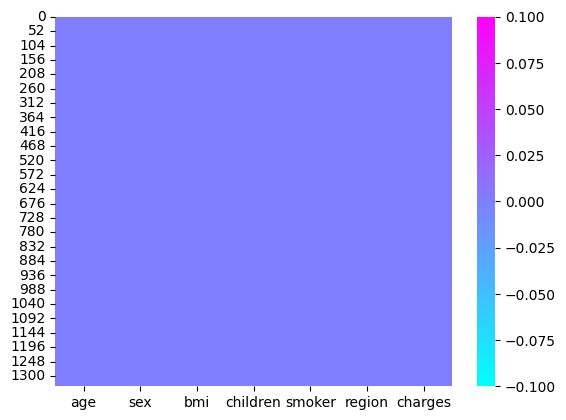

In [275]:
sns.heatmap(df_mi.isnull(), cmap = 'cool')

In [276]:
df_mi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


*Std deviation is high in charges

In [277]:
# Finding the number of unique values in a column

for index in df_mi.columns.to_list():

  print(index,':', df_mi[index].nunique())

age : 47
sex : 2
bmi : 548
children : 6
smoker : 2
region : 4
charges : 1337


Sex, Region, Childern are categorical as they have low number of unique count

bmi, age & charges are continous numeric

target label is continous hence it is regression problem

In [278]:
df_mi.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Skewness is within permissible limits in age, bmi & childern, chrges is target

# GRAPHICAL ANALYSIS

1. Univariate

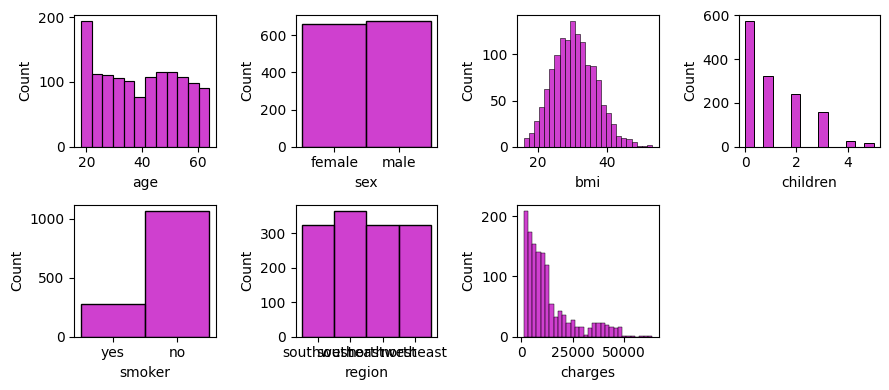

In [279]:
mp.figure(figsize=(9,4))
pnum = 1

for index in df_mi.columns.to_list():
  if(pnum<=7):
    ax = mp.subplot(2,4, pnum)
    sns.histplot(df_mi[index], color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Clearly age, bmi, charges are continous

while region, smoker, children and sex are categorical

BMI seems to well distributed

while Charges are skewed

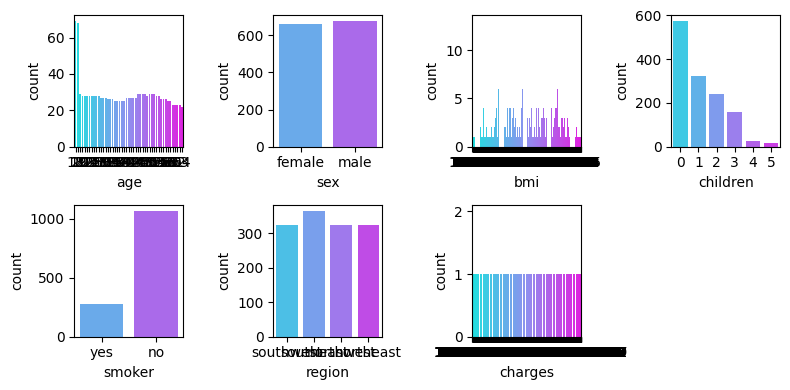

In [280]:
mp.figure(figsize=(8,4))
pnum = 1

for index in df_mi.columns.to_list():
  if(pnum<=7):
    ax = mp.subplot(2,4, pnum)
    sns.countplot(x=df_mi[index], palette = 'cool')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Clearly Smoker, region, sex & childern are categorical

where smoker, sex & region needs encoding

sex, region are close to balanced

childern, smoker are not balanced



# Encoding
Applying Label Encoder



In [281]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_mi['sex'] = le.fit_transform(df_mi['sex'])
df_mi['smoker'] = le.fit_transform(df_mi['smoker'])
df_mi['region'] = le.fit_transform(df_mi['region'])

In [282]:
df_mi.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061


**After Encoding**

1. Smoker : Yes = 1 , No = 0

2. Region : SE =2 , SW: 3, 1: NW, 0: NE

3. Sex: Female= 0, Male =1

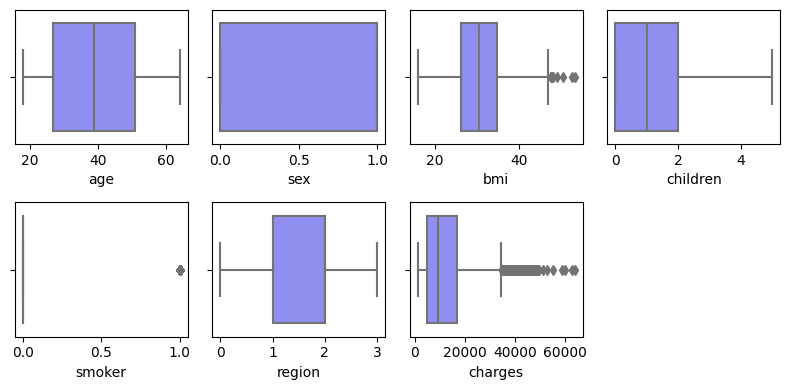

In [283]:
mp.figure(figsize=(8,4))
pnum = 1

for index in df_mi.columns.to_list():
  if(pnum<=7):
    ax = mp.subplot(2,4, pnum)
    sns.boxplot(x=df_mi[index], palette = 'cool')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

There are few outliers in BMI

BIVARIATE ANALYSIS

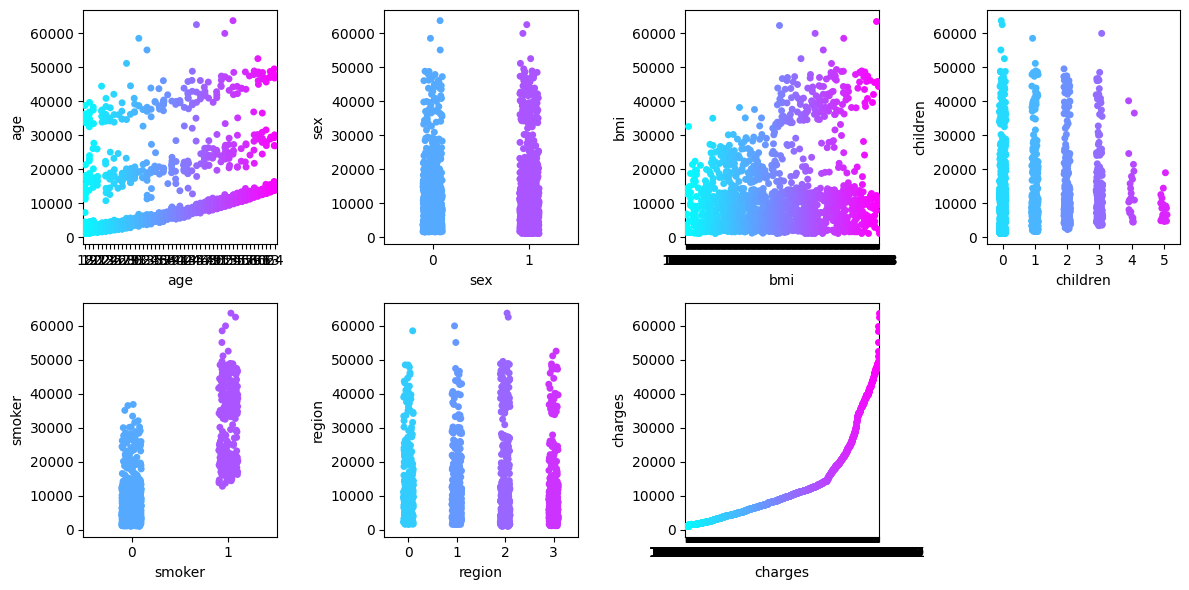

In [284]:
mp.figure(figsize=(12,6))
pnum = 1

for index in df_mi.columns.to_list():
  if(pnum<=7):
    ax = mp.subplot(2,4, pnum)
    sns.stripplot(x=df_mi[index], y =df_mi['charges'], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

From the stripplot it is evident that insurance cost are low for Non smokers

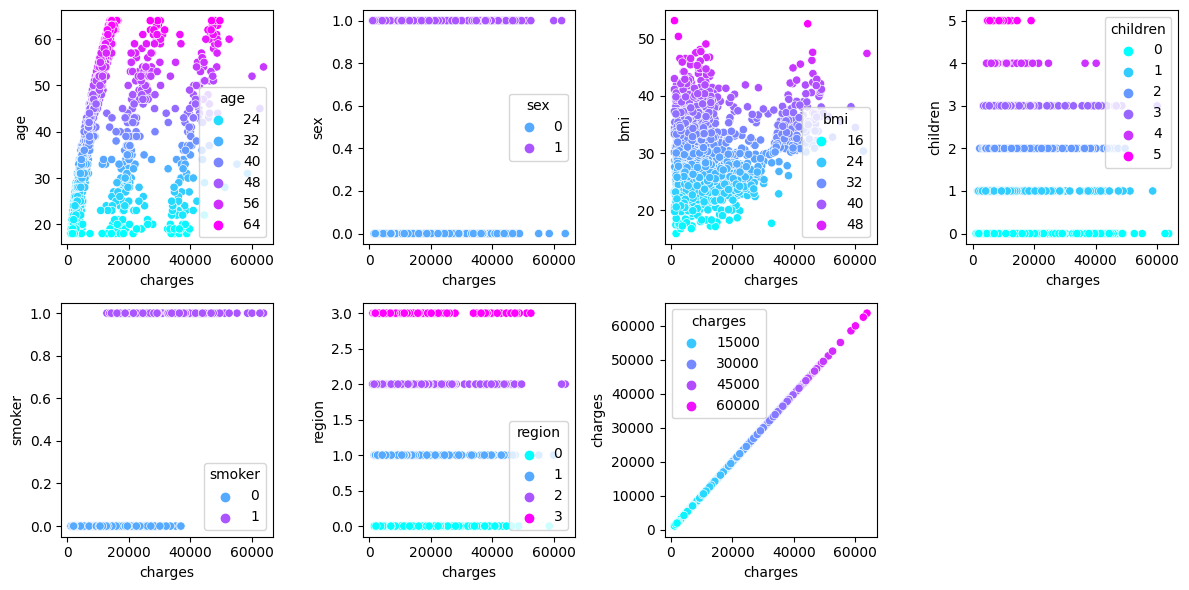

In [285]:
mp.figure(figsize=(12,6))
pnum = 1

for index in df_mi.columns.to_list():
  if(pnum<=7):
    ax = mp.subplot(2,4, pnum)
    sns.scatterplot(x=df_mi['charges'], y =df_mi[index], palette = 'cool', hue =df_mi[index])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Presnece of outliers in BMI can be seen

MULTIVARIATE ANALYSIS

<Axes: >

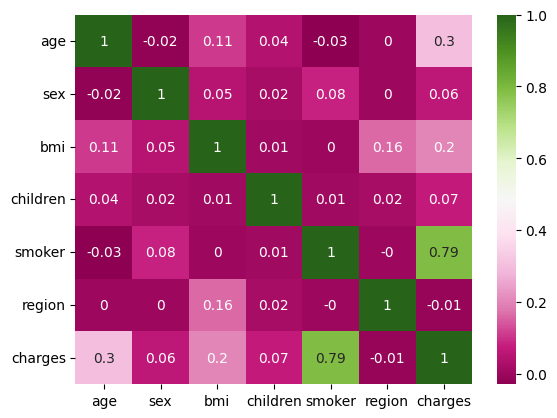

In [286]:
sns.heatmap(round(df_mi.corr(),2), cmap = 'PiYG', annot = True)

Strong +ve correlation exists between smoker & charges

**CHECK FOR OUTLIERS**

In [287]:
# Removing Outliers where |Z-score| > 3

df_features = df_mi.iloc[:,:-1]
df_target = df_mi['charges']

df_mi_zs = df_mi[(np.abs(sp.zscore(df_features)) <= 3).all(axis=1)]

print('Shape after removing outliers by Z-score method:',df_mi_zs.shape)
print('Shape before removing outliers by Z-score method:',df_mi.shape)


Shape after removing outliers by Z-score method: (1316, 7)
Shape before removing outliers by Z-score method: (1338, 7)


Z-score identified & removed 22 outliers

<Axes: xlabel='charges', ylabel='bmi'>

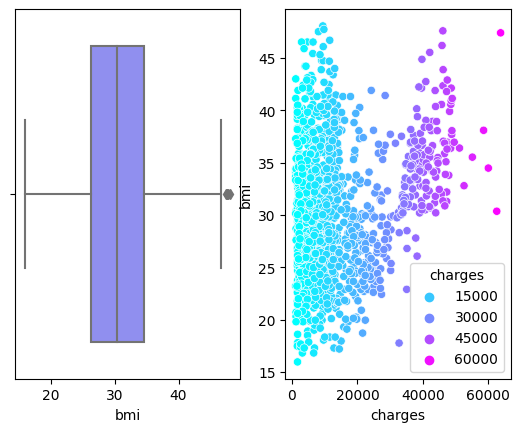

In [288]:
ax = mp.subplot(1,2,1)
sns.boxplot(x=df_mi_zs['bmi'], palette = 'cool')

ax = mp.subplot(1,2,2)
sns.scatterplot(x=df_mi_zs['charges'], y =df_mi_zs['bmi'], palette = 'cool', hue =df_mi[index])

In [289]:
# Removing Outliers using IQR

df_features = df_mi.iloc[:,:-1]
df_target = df_mi['charges']

Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

lower_bound = Q1 - (threshold * IQR)
upper_bound = Q3 + (threshold * IQR)

# Identify and remove outliers
mask = ((df_features >= lower_bound) & (df_features <= upper_bound)).all(axis=1)
df_mis_iq = df_mi[mask]

print(df_mis_iq .shape)


(1058, 7)


Outliers have been removed, persisting with z-score filtered dataframe,
as lots of data has been dropped in IQR method

Checking skewness

In [290]:

print(df_mi_zs.skew())

age         0.049904
sex        -0.012172
bmi         0.193564
children    0.740881
smoker      1.450367
region     -0.024107
charges     1.501055
dtype: float64


Skewness is within acceptable limits

Check Multicollinearity using VIF

In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_mi_zs.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_mi_zs.values,i) for i in range(len(df_mi_zs.columns))]

vif

,Feature,VIF Val
0,age,9.379903
1,sex,1.996886
2,bmi,10.612269
3,children,1.853359
4,smoker,4.013035
5,region,2.931169
6,charges,7.921977


** VIF is witin or close to permissible limit**

Hence not dropping any data

Scaling is not required as few fields are categorical and bmi & age are something that not needs scaling

# MODELLING

In [292]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score

x_df = df_mi_zs.iloc[:,:-1]
y_df = df_mi_zs['charges']

print(x_df.shape)
print(y_df.shape)

(1316, 6)
(1316,)


In [293]:
alpha = [0.001, 0.01, 0.1, 1]

min_mse = 999999999999999999999999
bst_rs = 0
bst_alpha = 0


for a in alpha:
  RG = Ridge(a)

  for i in range(1,70):

    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    RG.fit(x_train, y_train)
    predict = RG.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):

    min_mse = msq_err
    bst_rs = i
    bst_alpha = a

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "bst_aplha", bst_alpha, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 35929158.971442334 bst_aplha 0.001 r2_scr: 0.7603658357771333


In [294]:
alpha = [0.001, 0.01, 0.1, 1]

min_mse = 999999999999999999999999
bst_rs = 0
bst_alpha = 0


for a in alpha:
  LS= Lasso(a)

  for i in range(1,70):

    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    LS.fit(x_train, y_train)
    predict = LS.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):

    min_mse = msq_err
    bst_rs = i
    bst_alpha = a

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "bst_aplha", bst_alpha, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 35929111.14173655 bst_aplha 0.001 r2_scr: 0.7607111657019393


In [295]:
alpha = [0.001, 0.01, 0.1, 1]

min_mse = 999999999999999999999999
bst_rs = 0
bst_alpha = 0


for a in alpha:
  EN =  ElasticNet(a)

  for i in range(1,70):

    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    EN.fit(x_train, y_train)
    predict = EN.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):

    min_mse = msq_err
    bst_rs = i
    bst_alpha = a


print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "bst_aplha", bst_alpha, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 35952530.41657597 bst_aplha 0.001 r2_scr: 0.3578196362700188


In [296]:

min_mse = 999999999999999999999999
bst_rs = 0
LR = LinearRegression()


for i in range(1,70):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
  LR.fit(x_train, y_train)
  predict = LR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

if(msq_err <= min_mse):

  min_mse = msq_err
  bst_rs = i


print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "bst_aplha", bst_alpha, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 35929109.988760754 bst_aplha 0.001 r2_scr: 0.7607189865604956


In [297]:
from sklearn.tree import DecisionTreeRegressor
alpha = [3,5,7]
bst_max_depth = 0
min_mse = 999999999999999999999999
bst_rs = 0



for a in alpha:
  DTR = DecisionTreeRegressor(max_depth=a)

  for i in range(1,70):

    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    LS.fit(x_train, y_train)
    predict = LS.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):

    min_mse = msq_err
    bst_rs = i
    bst_max_depth = a

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "max_depth", bst_max_depth, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 35930284.32550915 max_depth 7 r2_scr: 0.7607111657019393


In all cases : random State = 69 and alpha = 0.001 is giving min mse

However, Linear Regression gives best r2_scr

In [298]:
from sklearn.model_selection import cross_val_score

cv = 5

RG = Ridge(0.001)
LS = Lasso(0.001)
EN = ElasticNet(0.001)
LM = LinearRegression()
DTR = DecisionTreeRegressor(max_depth=7)
model_list = [RG, LS, EN, LM, DTR]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', cvs.mean() )
  cv_score_list.append(cvs.mean())

Ridge(alpha=0.001) : Avg CV Score is  0.7471508573977645
Lasso(alpha=0.001) : Avg CV Score is  0.7471508502599983
ElasticNet(alpha=0.001) : Avg CV Score is  0.7471524416144055
LinearRegression() : Avg CV Score is  0.7471508430420551
DecisionTreeRegressor(max_depth=7) : Avg CV Score is  0.7979173993398556


# Creating the model best possible

Linear Model, , random state = 69

In [299]:
LRM = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = 69, test_size = 0.3)
LRM.fit(x_train, y_train)
predict = LRM.predict(x_test)
msq_err = mean_squared_error(y_test, predict)
r2_sc = r2_score(y_test, predict)

print(r2_sc, msq_err)

0.7607189865604956 35929109.988760754


# SAVE THE MODEL

In [304]:
import joblib

# Saving the Linear Model

joblib.dump(LRM, 'MIP_Pred.pkl')

['MIP_Pred.pkl']

# Checking the Predictions

In [305]:
# Load the saved model

load_MIP = joblib.load('MIP_Pred.pkl')

MIP = load_MIP

In [306]:
def pred_MIP(input):
  inp = np.array(input)
  med_ins_cost  =  MIP.predict(inp.reshape(1, -1))

  return med_ins_cost

In [307]:
tst_inpt1 = [18,1,33.7,1,0,2]
tst_inpt2 = [28,1,33.0,3,0,2]

print(pred_MIP(tst_inpt1))

print(pred_MIP(tst_inpt2))

[3827.28263867]
[7317.91404551]
